In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler




In [2]:
df = pd.read_csv('dados_treino_v6.csv', sep=',')
df.head()

,internacao,MP10_RUIM,O3_RUIM,TEMP_BAIXA,TEMP_ALTA,UR_BAIXA,UR_ALTA,DS_CID,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO
0,0,0,0,0,0,0,1,AMIGDALITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,0,0,0,1,F
1,0,0,0,0,0,0,1,ASMA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M
2,0,0,0,0,0,0,1,BRONQUIOLITE AGUDA,0,0,0,1,1,0,0,0,0,M
3,1,0,0,0,0,0,1,BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RE...,0,0,0,1,1,0,0,0,0,F
4,0,0,0,0,0,0,1,BRONQUITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M


In [3]:
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
df.head()

,internacao,MP10_RUIM,O3_RUIM,TEMP_BAIXA,TEMP_ALTA,UR_BAIXA,UR_ALTA,outono,inverno,primavera,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
headers = list(df.columns)[1:]
X = df[headers]
y = df['internacao']
df[headers].head()

,MP10_RUIM,O3_RUIM,TEMP_BAIXA,TEMP_ALTA,UR_BAIXA,UR_ALTA,outono,inverno,primavera,verao,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
# X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
# X[headers].head()


In [5]:
# a partir daqui
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [6]:
#over sampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [6]:
#under sampling
# rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [7]:
xgb_model  = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)
y_pred=xgb_model.predict(X_test)
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

<Axes: xlabel='Predicted', ylabel='Actual'>

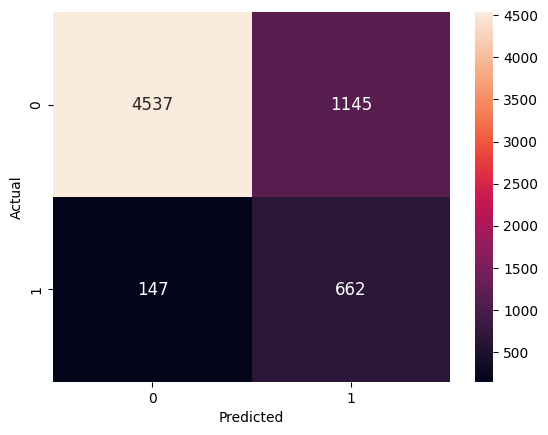

In [8]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [10]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print ('Specificity: ', specificity)

Accuracy:  0.8009551686951163
Sensitivity (Recall): 0.8182941903584673
Specificity:  0.7984864484336501
